In [3]:
!pip install pymysql

In [8]:
import pymysql

# Details of our mysql workbench
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='Zeese737!',
    database='covid19_data',
    port=3306
)

# Test the connection
try: 
    with connection.cursor() as cursor:
        cursor.execute("SELECT DATABASE();")
        db_name = cursor.fetchone()
        print(f"Connected to database: {db_name[0]}")
finally:
    connection.close()

Connected to database: covid19_data


In [18]:
# Query the database

# Details of our mysql workbench
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='Zeese737!',
    database='covid19_data',
    port=3306
)
query = "SELECT country_region, total_cases FROM covid_stats ORDER BY total_cases DESC LIMIT 10;"
with connection.cursor() as cursor:
    cursor.execute(query)
    results = cursor.fetchall()

# Print results
for row in results:
    print(row)

connection.close()

('Mexico', 462690)
('Bolivia', 86423)
('S. Korea', 14519)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
data = pd.read_csv('worldometer_data.csv')

data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


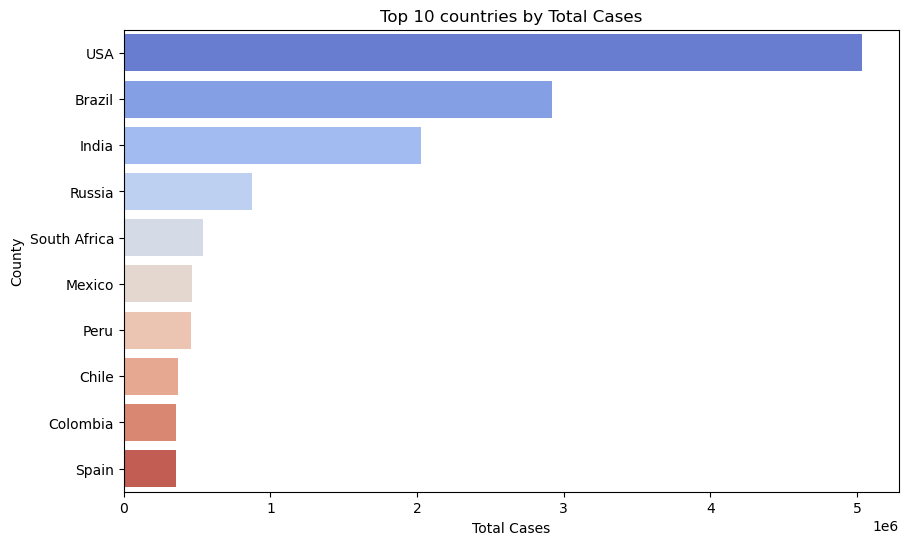

In [22]:
# Top 10 countries by total cases
top_countries = data.nlargest(10, 'TotalCases')

# Bar plot
plt.figure(figsize=(10, 6))

sns.barplot(
    x = "TotalCases",
    y = "Country/Region",
    data = top_countries,
    hue = "Country/Region",
    dodge=False,
    palette="coolwarm",
    legend=False
)

plt.title('Top 10 countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('County')
plt.show()